In [70]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


In [71]:
x_train.shape #lấy kích thước

(60000, 28, 28)

In [72]:
x_test.shape

(10000, 28, 28)

In [73]:
from keras import models
from keras.layers import Dense
from keras.models.cloning import Sequential
from keras.utils import to_categorical
from keras.models import load_model
import numpy as np

from keras.utils import load_img
from keras.utils import img_to_array
import matplotlib.pyplot as plt

In [74]:
number_to_label = {0:"T-shirt/top",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"}


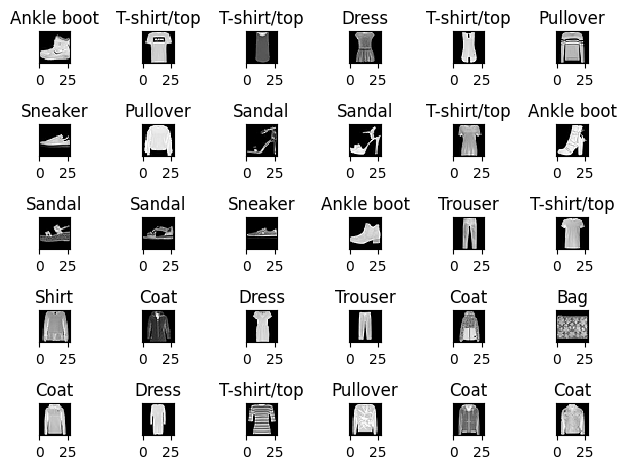

In [62]:
for i in range(30):  #5*6
  plt.subplot(5,6,i+1) #5 hàng, 6 cột
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray',interpolation='none')
  plt.title('{}'.format(number_to_label[y_train[i]]))
  plt.xticks
  plt.yticks([])

In [75]:
model=Sequential()
model.add(Dense(512,activation='relu',input_shape = (28*28,)))
model.add(Dense(10,activation='softmax',name='layout_1'))
  
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 layout_1 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [76]:
x_train=x_train.reshape((60000,28*28)) 
x_train=x_train.astype('float32')/255 
x_test=x_test.reshape((10000,28*28))
x_test=x_test.astype('float32')/255
  # one hot encoding 
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [78]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics= ['accuracy'])
model.fit(x_train,y_train,epochs=30,batch_size=128)
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Accuracy: ',test_acc)
print('Lost: ',test_loss)

Epoch 1/30
469/469 [==============================] - 4s 8ms/step - loss: 0.2259 - accuracy: 0.9164
Epoch 2/30
469/469 [==============================] - 4s 9ms/step - loss: 0.2173 - accuracy: 0.9178
Epoch 3/30
469/469 [==============================] - 4s 8ms/step - loss: 0.2092 - accuracy: 0.9226
Epoch 4/30
469/469 [==============================] - 4s 7ms/step - loss: 0.2029 - accuracy: 0.9250
Epoch 5/30
469/469 [==============================] - 4s 9ms/step - loss: 0.1985 - accuracy: 0.9274
Epoch 6/30
469/469 [==============================] - 4s 8ms/step - loss: 0.1903 - accuracy: 0.9297
Epoch 7/30
469/469 [==============================] - 4s 9ms/step - loss: 0.1866 - accuracy: 0.9314
Epoch 8/30
469/469 [==============================] - 4s 9ms/step - loss: 0.1797 - accuracy: 0.9340
Epoch 9/30
469/469 [==============================] - 4s 8ms/step - loss: 0.1745 - accuracy: 0.9358
Epoch 10/30
469/469 [==============================] - 4s 8ms/step - loss: 0.1709 - accuracy: 0.9366

In [80]:
model.save('FA_MNIST_DATA.h5')
model11 = load_model('FA_MNIST_DATA.h5')
model11.summary()
print(model11.predict([x_test]))


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 layout_1 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 1s 2ms/step
[[2.2657621e-15 9.9105572e-14 5.5893629e-15 ... 1.5382653e-06
  2.4843511e-11 9.9999815e-01]
 [1.7436649e-09 1.4567453e-16 9.9999970e-01 ... 2.0118792e-12
  9.3089262e-19 5.3997740e-19]
 [8.2957825e-19 9.9999994e-01 4.3667233e-25 ... 9.5755588e-27
  6.0078907e-26 2.2723364e-22]
 ...
 [1.3287052e-14 5.7862102e-23 3.6785556e-16 ... 4.9393531e-08
  9.9999994e-01 3.4329493e-18]
 [1.4136055e

1/1 [==============================] - 0s 29ms/step
Predict:  Sneaker
Actual : Sneaker


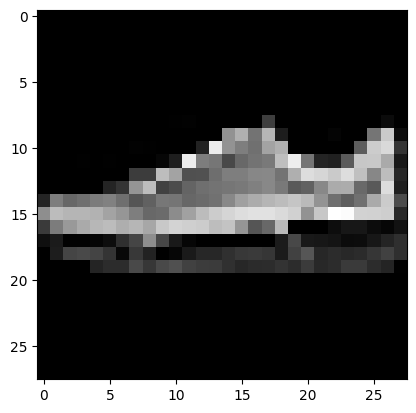

In [101]:
address=9
plt.imshow(x_test[address].reshape(28,28), cmap='gray')
y_predict = model11.predict(x_test[address].reshape(1,28*28))

print('Predict: ', number_to_label[np.argmax(y_predict)])
print('Actual :',number_to_label[np.argmax(y_test[address])])

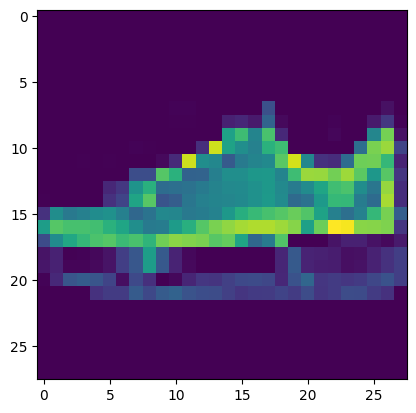

In [102]:
img = load_img(r'fa.jpg', target_size=(28,28))
img = img.convert('L')
plt.imshow(img)

In [103]:
model1 = load_model('FA_MNIST_DATA.h5')
img = img_to_array(img)
img = img.reshape(1,28*28)
img = img.astype('float32') / 255

number_to_label[np.argmax(model1.predict(img))]

1/1 [==============================] - 0s 45ms/step


'Sneaker'